## 💘 Amazon Best Sellers – Top Valentine Gifts 2024 🎯  

Valentine’s Day is one of the most popular shopping events of the year, driving millions of customers to find the perfect gift for their loved ones.  
This analysis explores **Amazon’s Top Valentine Gifts in 2024**, aiming to uncover what types of products captured the hearts (and wallets) of shoppers.  

Using data from Amazon’s best sellers, this project identifies trends across **product categories**, **brands**, and **customer ratings** to understand what made certain gifts stand out.  

### 🧠 Key Questions  
1. **Which product categories dominate Amazon’s best sellers – Top Valentine Gifts in 2024?**  
2. **Do higher customer ratings correlate with higher popularity (reviews)?**  
3. **Which brands appear most frequently among the top-selling Valentine products?**  
4. **How do customer preferences shape the Valentine gift market?**  

Through data visualization and exploratory analysis, we aim to highlight the main patterns that defined Valentine’s Day shopping on Amazon in 2024 — from trending categories to the brands that made the biggest impression.  


In [1]:
%pip install -q -U pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q -U watermark

Note: you may need to restart the kernel to use updated packages.


### 📦 Project Libraries - import

This section lists all the Python libraries used in this project. Keeping them organized here helps with reproducibility and makes it easier to install dependencies.

In [3]:
# Importing the library for data manipulation in tables
import pandas as pd 

# Importing the NumPy library for mathematical operations and arrays
import numpy as np  

# Importing the Matplotlib library for generating plots
import matplotlib.pyplot as plt  

# Importing the Seaborn library for statistical data visualization
import seaborn as sns  

# Jupyter Notebook magic command to display plots directly in the notebook
%matplotlib inline

In [4]:
# Load the watermark extension
%reload_ext watermark

# Display metadata for your notebook
%watermark -a "Maykon Analysis" -d -u -v -p numpy,pandas,matplotlib,seaborn

Author: Maykon Analysis

Last updated: 2025-10-25

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.6.0

numpy     : 2.3.4
pandas    : 2.3.3
matplotlib: 3.10.7
seaborn   : 0.13.2



#### Loading a dataset into your working environment (in this case, Python using the pandas library).

In [5]:
# data = r'D:\Desktop\Projects\Data-Analysis-Amazon-Best-Sellers-in-2024\data\best_sellers24.csv'
data = r"C:\Users\LarTI\OneDrive\Desktop\Projects\Data-Analysis-Amazon-Best-Sellers-in-2024\data\best_sellers24.csv"

df = pd.read_csv(data)  

In [6]:
df.shape #the dimensions of your DataFrame (rows, columns).

(218, 11)

In [7]:
df.head() #shows the first 5 rows.

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


In [8]:
df.tail()  #shows the last 5 rows.

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
213,JOYIN 28 Packs Valentine's Day Gift Cards with...,JOYIN,NaN,0.14,0.17,0.55,30.0,NaN,$,22.99,305
214,THEMEROL Natural Gemstone Bracelet Gifts for D...,THEMEROL,NaN,0.03,0.07,0.87,140.0,NaN,NaN,NaN,300
215,Juegoal 28 Pack Valentines Day Gift Cards for ...,Juegoal,NaN,0.05,0.16,0.68,113.0,NaN,$,21.99,296
216,Double Couple Gift for Mom Women-Rose Cute Bea...,Double Couple,NaN,0.06,0.15,0.72,347.0,NaN,$,19.59,298
217,Valentine's Day Gifts For Her - Rose in Glass ...,Norcalway,NaN,0.04,0.10,0.81,423.0,NaN,$,23.97,310


In [9]:
df.info()  #Gives you a summary overview of your entire DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             218 non-null    object 
 1   brand                             217 non-null    object 
 2   description                       46 non-null     object 
 3   starsBreakdown/3star              218 non-null    float64
 4   starsBreakdown/4star              218 non-null    float64
 5   starsBreakdown/5star              218 non-null    float64
 6   reviewsCount                      216 non-null    float64
 7   price                             0 non-null      float64
 8   price/currency                    169 non-null    object 
 9   price/value                       169 non-null    float64
 10  categoryPageData/productPosition  218 non-null    int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
df.describe(include='all')  #generate a summary of statistics for all columns in your DataFrame — both numerical and categorical.

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
count,218,217,46,218.000000,218.000000,218.000000,216.000000,0.0,169,169.000000,218.000000
unique,218,168,46,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,NaN,NaN,NaN,NaN,NaN,$,NaN,NaN
freq,1,6,1,NaN,NaN,NaN,NaN,NaN,169,NaN,NaN
mean,NaN,NaN,NaN,0.049220,0.105275,0.767936,2863.759259,NaN,NaN,18.046805,127.123853
std,NaN,NaN,NaN,0.041966,0.066756,0.151997,7104.953282,NaN,NaN,11.696470,91.812865
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,1.990000,1.000000
25%,NaN,NaN,NaN,0.030000,0.072500,0.720000,54.750000,NaN,NaN,9.990000,52.250000
50%,NaN,NaN,NaN,0.040000,0.100000,0.790000,387.500000,NaN,NaN,15.950000,103.500000
75%,NaN,NaN,NaN,0.070000,0.130000,0.850000,1581.500000,NaN,NaN,21.990000,193.750000


In [11]:
df.dtypes  #It shows the data type (dtype) of each column in the DataFrame.

title                                object
brand                                object
description                          object
starsBreakdown/3star                float64
starsBreakdown/4star                float64
starsBreakdown/5star                float64
reviewsCount                        float64
price                               float64
price/currency                       object
price/value                         float64
categoryPageData/productPosition      int64
dtype: object

#### Identify any missing values and decide how to handle them, Data Preparation (Cleaning & Transformation).

In [12]:
df.isnull().sum() #Show me how many missing values each column has.

title                                 0
brand                                 1
description                         172
starsBreakdown/3star                  0
starsBreakdown/4star                  0
starsBreakdown/5star                  0
reviewsCount                          2
price                               218
price/currency                       49
price/value                          49
categoryPageData/productPosition      0
dtype: int64

In [13]:
df['reviewsCount'] = df['reviewsCount'].astype('Int64')  #Convert the 'reviewsCount' column to integer type, allowing for missing values.

In [14]:
df = df.drop(columns=['price', 'price/value', 'price/currency']) #For this analysis, these columns are not necessary.

In [15]:
# Fill missing brand and description values
df['brand'] = df['brand'].fillna('Unknown')
df['description'] = df['description'].fillna('No description')

# Fill missing reviewsCount with 0
df['reviewsCount'] = df['reviewsCount'].fillna(0)


In [18]:
df.duplicated().sum() #Check for duplicate rows in the DataFrame.
#df = df.drop_duplicates() - if you find duplicates, you can uncomment this line to remove them.

np.int64(0)

In [19]:
df.isnull().sum() #Show me how many missing values each column has after cleaning.

title                               0
brand                               0
description                         0
starsBreakdown/3star                0
starsBreakdown/4star                0
starsBreakdown/5star                0
reviewsCount                        0
categoryPageData/productPosition    0
dtype: int64

In [20]:
df.dtypes

title                                object
brand                                object
description                          object
starsBreakdown/3star                float64
starsBreakdown/4star                float64
starsBreakdown/5star                float64
reviewsCount                          Int64
categoryPageData/productPosition      int64
dtype: object

#### Now it’s time to begin the EDA (Exploratory Data Analysis)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             218 non-null    object 
 1   brand                             218 non-null    object 
 2   description                       218 non-null    object 
 3   starsBreakdown/3star              218 non-null    float64
 4   starsBreakdown/4star              218 non-null    float64
 5   starsBreakdown/5star              218 non-null    float64
 6   reviewsCount                      218 non-null    Int64  
 7   categoryPageData/productPosition  218 non-null    int64  
dtypes: Int64(1), float64(3), int64(1), object(3)
memory usage: 14.0+ KB


#### Which product categories dominate Amazon’s best sellers - Top Valentine Gifts 🎯💘 in 2024?

In [23]:
# Top brands (as a proxy for dominant categories)
df['brand'].value_counts().head(10)

brand
Ferrero Rocher       6
LEGO                 6
JOYIN                6
Hallmark             5
ChunRun              3
HERSHEY'S            3
Shemira              3
VANLOVEMAC           3
CHAIN & JO SWEETS    3
Burt's Bees          2
Name: count, dtype: int64

In [30]:
from collections import Counter
import re

# Combine all product titles into a single string
words = ' '.join(df['title']).lower()

# Extract only words
words = re.findall(r'\b[a-zA-Z]+\b', words)

# Remove generic words that don't indicate category
stopwords = {'for', 'with', 'and', 'gift', 'gifts', 'set', 'the', 'of', 'in', 'to', 'a', 'an', 'by', 'on', 'valentine', 'day'}
filtered_words = [w for w in words if w not in stopwords]

# Count the most frequent words
common_words = Counter(filtered_words).most_common(10)


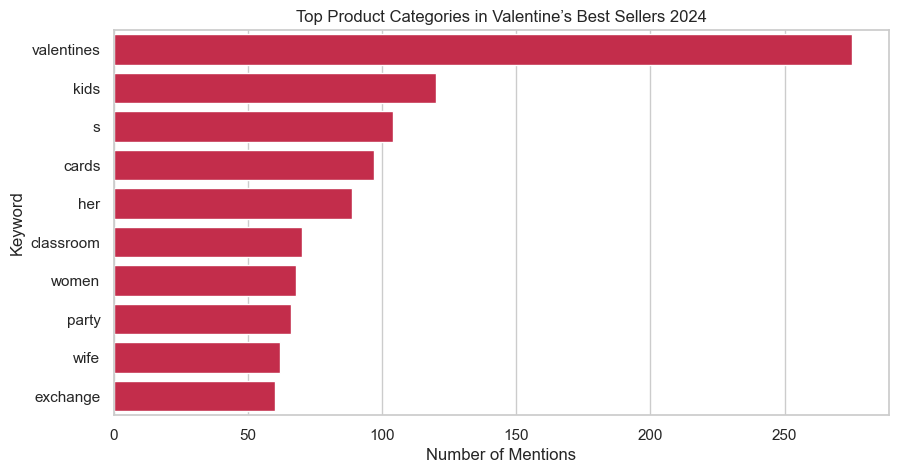

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

sns.barplot(data=common_df, x='Count', y='Keyword', color='crimson')
plt.title('Top Product Categories in Valentine’s Best Sellers 2024')
plt.xlabel('Number of Mentions')
plt.ylabel('Keyword')

plt.show()  # <- This ensures the plot displays
